In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import bspline

from rf import RF, RFDecisionNode

In [2]:
np.random.seed(0)

In [3]:
def noisy_signal(x, sigma=0.1):
    x = np.array(x)
    return np.sin(x) / x + np.random.normal(scale=sigma, size=x.size)

In [4]:
x = np.linspace(10e-5, 10*np.pi, num=100)
y = noisy_signal(x, sigma=0.1)

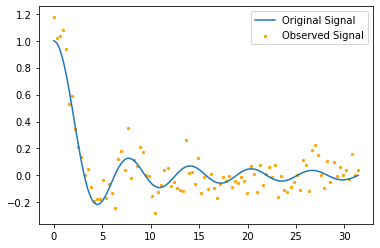

In [5]:
plt.scatter(x, y, s=5, color="orange", label="Observed Signal")
plt.plot(x, np.sin(x) / x, label="Original Signal")
plt.legend()
plt.show()

In [6]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

rf = RF(x, y, max_depth=10, n_features=1, min_leaf_size=5, n_trees=1000, n_bagging=10)
rf.create_model()

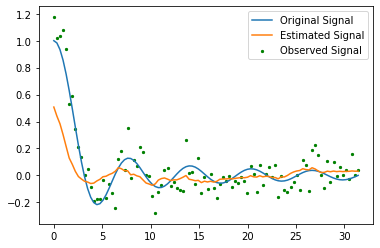

In [7]:
plt.scatter(x, y, s=5, color="green", label="Observed Signal")
plt.plot(x, np.sin(x) / x, label="Original Signal")
plt.plot(x, [np.mean(rf.predict(i)) for i in x], label="Estimated Signal")
plt.legend()
plt.show()